##**Task4:-Exploratory Data Analysis - Terrorism**

Task is to perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ and as a security/defense analyst try to find out the hot zone of terrorism.

Link to the dataset:- https://bit.ly/2TK5Xn5


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
%matplotlib inline

import folium
# to avoid warnings during execution
from warnings import filterwarnings
filterwarnings('ignore') 

In [ ]:
from google.colab import files
uploaded = files.upload()       

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [126]:
#read data from link 
df = pd.read_csv(io.BytesIO(uploaded['globalterrorismdb_0718dist.csv']),encoding='latin1')

#displaying first 5 rows of the dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [127]:
#displaying the number of rows and columns
df.shape

(181691, 135)

In [145]:
#Making a dataset with only the necessary columns
data=df[['iyear', 'imonth', 'iday','country_txt','region_txt',
       'provstate', 'city', 'location',  'success', 'suicide', 'attacktype1_txt',
        'targtype1_txt', 'gname', 'weaptype1_txt','nkill','nwound']]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [132]:
#checking the number of null values in the dataset
data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
location           126196
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
gname                   0
weaptype1_txt           0
nkill               10313
nwound              16311
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   location         55495 non-null   object 
 8   success          181691 non-null  int64  
 9   suicide          181691 non-null  int64  
 10  attacktype1_txt  181691 non-null  object 
 11  targtype1_txt    181691 non-null  object 
 12  gname            181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
dtypes: float64(2), int64(5), object(9)
mem

In [171]:
#replacing null values in columns nkill,nkillus, nwound and nwoundus  with 0 for better analysis 
data['nwound'] = data['nwound'].fillna(0)
data['nkill'] = data['nkill'].fillna(0)
data.shape

(181691, 17)

##**Data Visualisation and EDA**

###**Analysing number of attacks in each year**

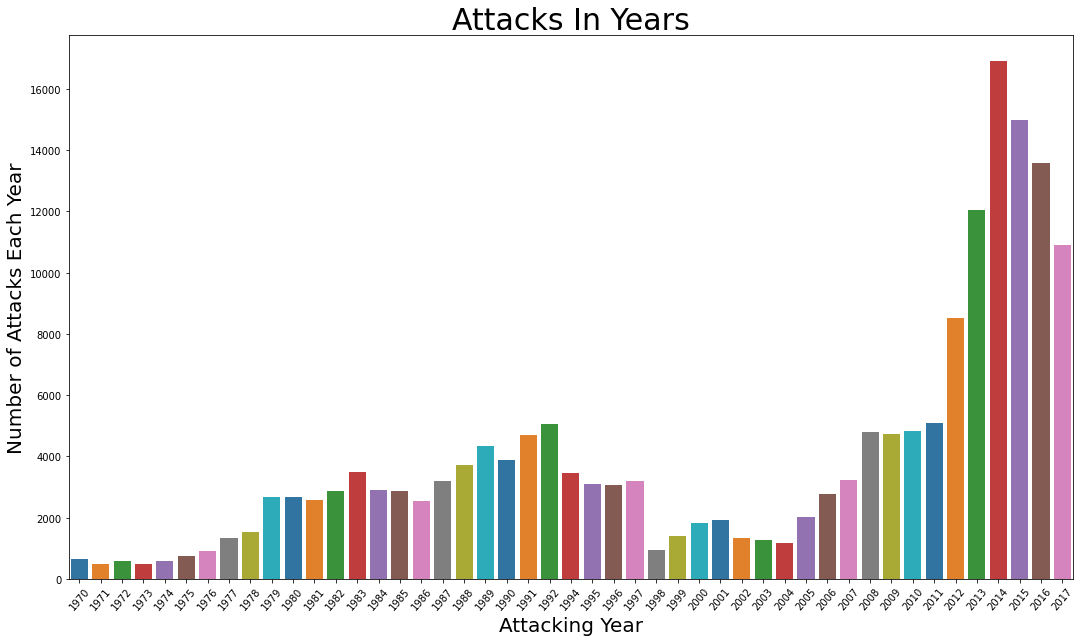

In [135]:
x = data['iyear'].unique() 
 # vlaue_counts returns the number of unique occurrences in the specified column and sort_index() sorts objects by labels along the given axis.
y = data['iyear'].value_counts().sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x, y,palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

###**Observations**
* Less number of attacks (approx < 1000) took place from the years 1970 to 1974
* Large number of number of attacks (approx > 8000) took place from the years 2014 to 2017

###**Analaysing number of attacks in each region year-wise(1970-2017)**

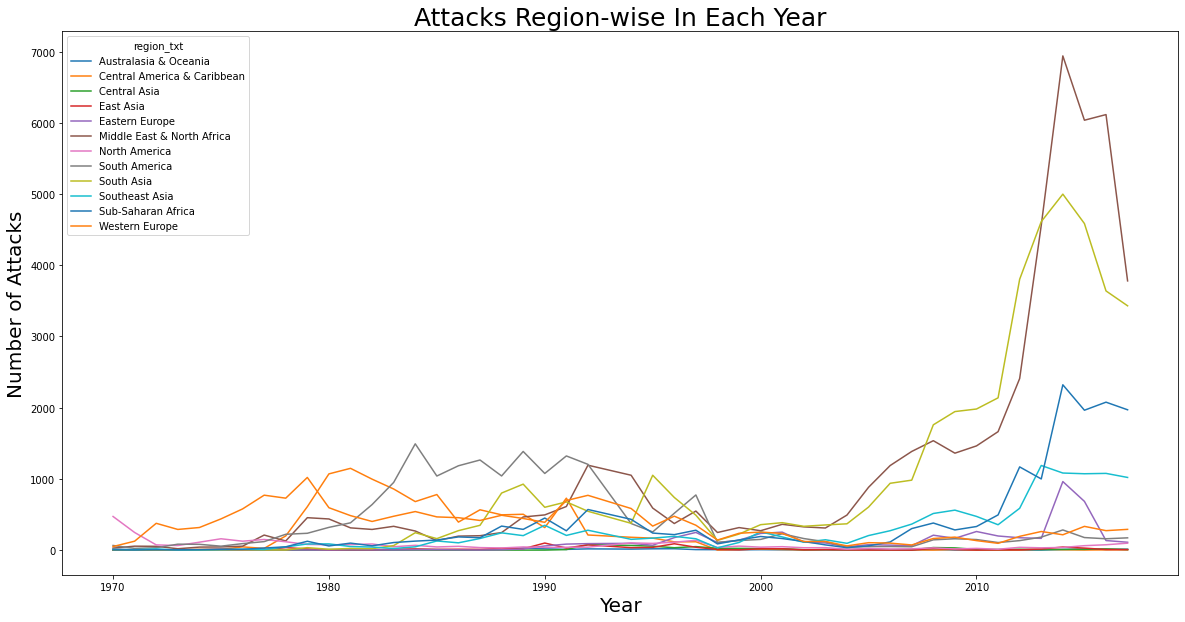

In [137]:
#In crosstab index is plotted on X axis and the count of index to column is plotted on y axis
pd.crosstab(index=data['iyear'],columns=data['region_txt']).plot(kind='line',figsize=(20,10))
plt.title('Attacks Region-wise In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

###**Observation:-**
* In the 1970s most terrorist attacks occurred in Western Europe
* In 1980s most attacks took place in Central America & Carribbean and South America
*  Between the mid-1990s and 2003 there is an overall decline in the number of attacks. 
* After 2010,the Middle East and North Africa along with South Asia are the hardest hit by terrorist attacks. 

###**Analysing top 10 most attacked countries**

In [138]:
top_attacks=data['country_txt'].value_counts()[:10]
top_attacks

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

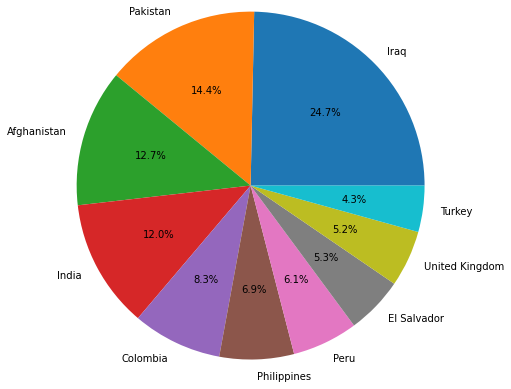

In [139]:
plt.pie(top_attacks.values, labels=top_attacks.index,autopct='%1.1f%%',radius=2)
plt.show()

Observation:- The above pie chart shows that among the top 10 coutries Iraq is attacked the most(24.7% times)  

##**Analysing the Terrorist attacks in different states**

In [146]:
data['provstate'].value_counts(dropna=False).head()

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: provstate, dtype: int64

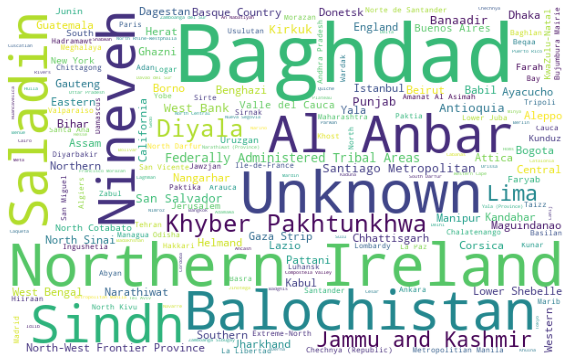

In [147]:
#Tag Cloud or WordCloud is a visualisaiton technique used to represent the frequency or importance of each words represented by their size
#making wordcloud to analyse which states were attacked the most
from wordcloud import WordCloud

data1=data['provstate'].value_counts().to_dict()
plt.figure(figsize=(10,30))

wordcloud=WordCloud(width =612,height =384,background_color='white' ).generate_from_frequencies(data1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Observsation:-From the cloud we can see some of the worst hit states are:- Baghdad,Northern Ireland,Balochistan,Saladin                

##**Analysing Terrorist attack types and total casualitites**

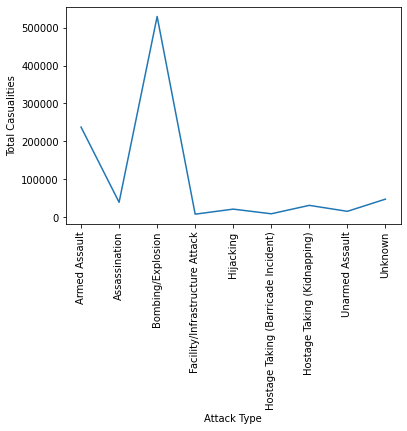

In [173]:
data['casualities']=data['nkill']+data['nwound']
attack_df=data.groupby('attacktype1_txt')['casualities'].sum()
plt.plot(attack_df.index,attack_df.values)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('Total Casualities')
plt.show()

Observsation:- The above graph shows that maximum causalites are caused due to bombing/Explosion and minimum causalites are caused due to Facility/Infrastructure attack

##**Analysing the Terrorist organisations**

In [150]:
#analysing which terrorsit organisations have attacked the most
df2=data['gname'].value_counts()[1:11]
df2

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64

<BarContainer object of 10 artists>

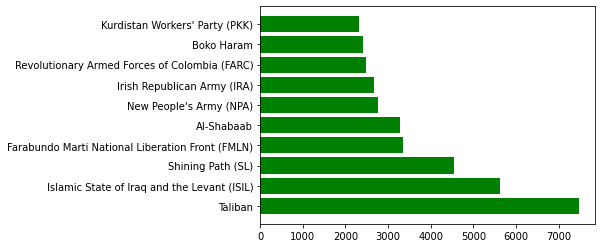

In [151]:
#plotting the above data
plt.barh(df2.index,df2.values,color='g')

Observation:-Maximum attacks are done by Taliban,ISIL and SL

##**Analysing Heaviest Hit Target Types**


In [184]:
target=data.groupby('targtype1_txt')['casualities'].sum().sort_values(ascending=False)
target=target[:10]

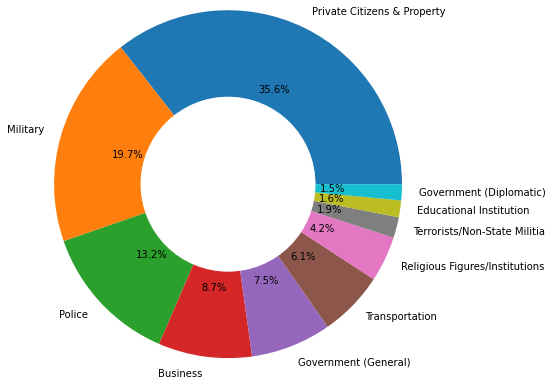

In [190]:
#creating doughnut chart to represent the %percentage of attacks on each target group
plt.pie(target.values, labels=target.index,autopct='%1.1f%%',radius=2)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Observation:-Private Citizens and Property are targetted the most by terrorsit organisations

##**Analysing number of suicide attacks in the cities**

In [195]:
#displaying the top 10 cities with most number of suicide attacks
data.groupby('city')['suicide'].sum().sort_values(ascending=False).head(10)

city
Baghdad      496
Mosul        300
Kabul        242
Unknown      175
Ramadi       170
Maiduguri    125
Mogadishu    114
Kandahar     102
Fallujah      72
Baqubah       72
Name: suicide, dtype: int64

Observation:- Baghdad has the most number of suicide attacks followed by Mosul

##**Summary**
####**Most Hit :-**
* Year :-2014
* Region:  
   * 1970s-> Western Europe
   * 1980s->Central America & Carribbean and South America
   * After 2010->the Middle East, North Africa and South Asia are the most hit 
* Country:- Iraq
* State :- Baghdad
* Target Type :- Private Citizens and Property

Most number of Suicide Attacks: Baghdad

Most attacked target type:- Private Citizens and Property

Organsiation that attacked the most:-Taliban

